<a href="https://colab.research.google.com/github/Divya9877/AIML/blob/main/Copy_of_Grover_over_linear_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Performance of Grover's Algorithm over Linear Search

"This comprehensive tutorial demonstrates and compares **Grover's quantum search algorithm** with **classical linear search**. You'll learn how quantum computing can provide a quadratic speedup for unstructured search problems.

#### What You'll Learn:

    - How classical linear search works
    - The principles behind Grover's quantum search algorithm
    - Implementation using Amazon Braket SDK
    - Performance comparison and visualization
    - When quantum search provides advantages

#### Prerequisites:

    - Basic understanding of quantum computing concepts
    - Python programming knowledge
    - Familiarity with bitstrings and binary representation



In [ ]:
pip install amazon-braket-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.6/225.6 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 537.8/537.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: antlr4-python3-runtime
    Found existing installation: antlr4-python3-runtime 4.9.3
    Uninstalling antlr4-python3-runtime-4.9.3:
      Successfully uninstalled antlr4-pytho

In [ ]:
# Standard library imports
from itertools import product
import random
import time
import math

# Amazon Braket SDK for quantum computing
from braket.circuits import Circuit
from braket.devices import LocalSimulator

# Visualization
import matplotlib.pyplot as plt
import numpy as np

print("All libraries imported successfully!")


All libraries imported successfully!


### 1. Database Generation
In search problems, we need a database to search through. For this tutorial, we'll create a database containing all possible bitstrings of a given length.

#### Theory:
In both classical and quantum search problems, we consider a database of
$N=2^n$ items, where each item is indexed by an n-bit string. For example, with $n=3$, the database contains all bitstrings from '000' to '111'.

A **bitstring** is simply a sequence of 0s and 1s, like `101` or `0011`. Think of it as a digital "word" where each position can only be a 0 or 1.

**Examples:**

- 1-bit: `0`, `1` (2 possibilities)
    
- 2-bit: `00`, `01`, `10`, `11` (4 possibilities)
    
- 3-bit: `000`, `001`, `010`, `011`, `100`, `101`, `110`, `111` (8 possibilities)

In [ ]:
def generate_database(n_bits=3, randomize=False):
    db = [''.join(bits) for bits in product('01', repeat=n_bits)]
    if randomize:
        random.shuffle(db)
    return db

test_db = generate_database(3)
print(f"3-bit database: {test_db}")
print(f"Database size: {len(test_db)} items")


3-bit database: ['000', '001', '010', '011', '100', '101', '110', '111']
Database size: 8 items


### What is Linear Search?

- Linear search is like looking for your keys by checking every pocket one by one. It's the most basic search method: start at the beginning, check each item, stop when you find what you're looking for.

- Before we can appreciate quantum speedup, we need to understand the classical baseline. Linear search represents the **fundamental limit** of classical computing for unorganized data.

#### Mathematical Analysis

**Time Complexity:**

- **Best case:** 1 comparison (target is first item)
    
- **Worst case:** N comparisons (target is last item or missing)
    
- **Average case:** N/2 comparisons
    

**Big-O Notation:** $\mathcal{O}(N)$ - the time grows linearly with database size


**Step-by-step explanation:**

1. **Initialize counter:** `comparisons = 0` tracks how many items we've checked
    
2. **Loop through database:** `enumerate(database)` gives us both position and value
    
3. **Count each check:** `comparisons += 1` - this is our "cost" metric
    
4. **Compare:** `if item == target` - the actual search operation
    
5. **Success:** Return the index where we found the target
    
6. **Failure:** Return -1 if we've checked everything and found nothing
    

In [ ]:
def linear_search(database, target, verbose=False):
    comparisons = 0
    for idx, item in enumerate(database):
        comparisons += 1
        if verbose:
            print(f"Step {comparisons}: Checking index {idx}, value '{item}'")
        if item == target:
            if verbose:
                print(f"✓ Found '{target}' at index {idx} after {comparisons} comparisons")
            return idx
    if verbose:
        print(f"✗ '{target}' not found after {comparisons} comparisons")
    return -1

demo_db = generate_database(3)
target = '101'

print(f"Database: {demo_db}")
print(f"Searching for: '{target}'")
print("\n--- Linear Search Process ---")
result = linear_search(demo_db, target, verbose=True)

print(f"\nResult: Index {result}")
if result != -1:
    print(f"Verification: database[{result}] = '{demo_db[result]}'")


Database: ['000', '001', '010', '011', '100', '101', '110', '111']
Searching for: '101'

--- Linear Search Process ---
Step 1: Checking index 0, value '000'
Step 2: Checking index 1, value '001'
Step 3: Checking index 2, value '010'
Step 4: Checking index 3, value '011'
Step 5: Checking index 4, value '100'
Step 6: Checking index 5, value '101'
✓ Found '101' at index 5 after 6 comparisons

Result: Index 5
Verification: database[5] = '101'


### Quantum Advantage
Classical computers are **fundamentally limited** to checking items one by one. No classical algorithm can do better than $\mathcal{O}(N)$ for unsorted data. This is a **proven mathematical fact**.

Quantum computers, however, can break this limitation through **quantum parallelism** - they can effectively check multiple items simultaneously.

#### Example

Searching for `'101'` in `['000', '001', '010', '011', '100', '101', '110', '111']`:

- Classical: Must check items 1, 2, 3, 4, 5, 6 before finding `'101'` at position 5
    
- Result: 6 comparisons needed
    
- This demonstrates the linear relationship between database size and search time

### Optimal Grover Iterations

#### Why Do We Need "Optimal" Iterations?

Unlike classical search (which stops when found), quantum search is **probabilistic**. We need to run the quantum algorithm for exactly the right number of steps to maximize our chances of success.

Think of it like tuning a radio - too much few turns and you don't reach the station, too many and you overshoot it.

#### The Mathematical Foundation

The optimal number of iterations for Grover's algorithm is:  
$$r=\begin{bmatrix}\frac{π}{4} \sqrt{N}\end{bmatrix}$$

Where:

- $N = 2^n$ is the database size
    
- $\lfloor \cdot \rfloor$ means "round down to nearest integer"
    
- $\pi \approx 3.14159$ comes from the geometric nature of quantum rotations

#### Why This Formula Works

Grover's algorithm works by **rotating** the quantum state in a special mathematical space. Each iteration rotates the state by a fixed angle toward the target state. The formula calculates exactly how many rotations are needed to point directly at the target.

**Geometric intuition:**

- Start pointing at 45° from target
    
- Each iteration rotates by $\frac{2}{\sqrt{N}}$ radians
    
- Need to rotate total of $\frac{\pi}{2}$ radians to reach target
    
- Therefore: $\frac{\pi/2}{2/\sqrt{N}} = \frac{\pi\sqrt{N}}{4}$ iterations
    
## Practical Examples

|Qubits|Database Size|Classical (worst)|Grover Iterations|Speedup|
|---|---|---|---|---|
|1|2|2|1|2×|
|2|4|4|1|4×|
|3|8|8|2|4×|
|4|16|16|3|5.3×|
|10|1,024|1,024|25|41×|
|20|1,048,576|1,048,576|804|1,304×|

**Key insight:** As the database grows, the quantum advantage becomes more dramatic!

In [ ]:
def calculate_optimal_iterations(n_qubits):
    """
    Calculate the optimal number of Grover iterations.
    """
    N = 2 ** n_qubits
    optimal = int(math.pi / 4 * math.sqrt(N))
    return max(1, optimal)

print("Optimal Grover iterations for different database sizes:")
for n in range(1, 8):
    db_size = 2**n
    iterations = calculate_optimal_iterations(n)
    print(f"{n} qubits: {db_size} items → {iterations} iterations")


Optimal Grover iterations for different database sizes:
1 qubits: 2 items → 1 iterations
2 qubits: 4 items → 1 iterations
3 qubits: 8 items → 2 iterations
4 qubits: 16 items → 3 iterations
5 qubits: 32 items → 4 iterations
6 qubits: 64 items → 6 iterations
7 qubits: 128 items → 8 iterations


### Grover's Quantum Search Algorithm

### What Makes Quantum Search Different?

Classical computers check items **one at a time**. Quantum computers can check **all items simultaneously** through a phenomenon called **quantum superposition**.

#### The Three Pillars of Grover's Algorithm

##### 1. **Superposition** - Being in All States at Once

**What happens:** The Hadamard gate (H) puts each qubit in a **superposition** of 0 and 1:  
$$H∣0⟩=\frac{1}{2}(∣0⟩+∣1⟩)$$
$$H∣1⟩=\frac{1}{2}(∣0⟩-∣1⟩)$$

For n qubits, this creates a superposition of ALL possible bitstrings:  
$$∣ψ⟩ = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle$$

**Analogy:** Imagine spinning 3 coins simultaneously - while spinning, each coin is both heads AND tails, representing all 8 possible combinations at once.

##### 2. **Oracle** - Marking the Target

**What the oracle does:**

1. **Preparation:** Flip qubits so target becomes `|111...1⟩`
    
2. **Phase flip:** Multiply target amplitude by -1
    
3. **Restoration:** Flip qubits back to original basis
    

**Mathematical effect:** $U_f|x\rangle = (-1)^{f(x)}|x\rangle$ where $f(x) = 1$ only for the target.

**Why this works:** The negative sign doesn't change probabilities ($|-a|^2 = |a|^2$), but it sets up **quantum interference** for the next step.

##### 3. **Diffusion Operator** - Amplifying the Target

**What diffusion does:** "Inversion about the mean" - reflects all amplitudes about their average value.

**Mathematical formula:** $D = 2|\psi\rangle\langle\psi| - I$

**Effect:** States with below-average amplitude get boosted, states with above-average amplitude get reduced. Since the target has negative amplitude (below average), it gets amplified!

#### The Complete Algorithm workflow


1. **Start:** Equal superposition of all states
    
2. **Oracle:** Target gets negative phase (marked)
    
3. **Diffusion:** Negative amplitude gets amplified
    
4. **Repeat:** Each iteration increases target probability
    
5. **Measure:** High probability of measuring target state
    

**Key insight:** We're not "searching" in like we do in the classical sense - we're **sculpting probability** through quantum interference.






***

## Explanation of Grover's Search Algorithm Code

This Python function implements a demonstration of Grover's search algorithm for finding a target bitstring within an unstructured search space using up to 3 qubits.

### Key Elements of the Code

- **Target and Qubits Setup:**  
  - The target bitstring (e.g., `'101'`) is searched within a space of $$2^{n_{\text{qubits}}}$$ elements.  
  - The code supports up to 3 qubits for demonstration purposes, as larger implementations require more complex multi-controlled gates with ancilla qubits.

- **Initialization:**  
  - The `initialize_superposition` function creates a uniform superposition of all possible states by applying Hadamard gates (H) on all qubits. This step prepares the quantum register to represent an equal probability amplitude across all database indices.

- **Oracle Construction:**  
  - The `oracle` function marks the target state by flipping its phase (applying a -1 phase) while leaving other states unchanged. This is done by applying $$X$$ gates on qubits corresponding to zero bits of the target, then applying multi-controlled-Z or multi-controlled-NOT gates based on qubit count, and finally undoing the $$X$$ gates.  
  - For 3 qubits, a Toffoli (CCNOT) gate controlled by the first two qubits toggles the third, encapsulated between Hadamard gates to implement a phase flip.

- **Diffusion Operator (Amplitude Amplification):**  
  - The `diffusion_operator` reflects all amplitudes about their average value, amplifying the amplitude of the target state(s). It is implemented via a sequence of Hadamard, $$X$$, multi-controlled-Z gates, and inverse operations.

- **Grover Iterations:**  
  - The main loop applies the oracle and diffusion operators $$n_{\text{reps}}$$ times (optimal iterations calculated elsewhere), amplifying the probability amplitude of the target state.

- **Measurement and Results:**  
  - The algorithm runs the circuit on a local quantum simulator for a specified number of shots (e.g., 1000).  
  - Measurement results (counts) are collected and the success rate (frequency of the target outcome) is displayed if verbose mode is on.

### Grover's Algorithm Overview

Grover's algorithm provides a quadratic speedup over classical search algorithms by amplifying the amplitude of the target state via repeated applications of the oracle and diffusion operations. Starting from a uniform superposition of all possible states, the algorithm iteratively enhances the likelihood of measuring the desired target item.

### Limitations and Scope

- The code supports only up to 3 qubits for demonstration, due to the complexity of implementing multi-controlled phase gates for larger qubit counts.  
- The function is flexible in terms of shots and verbosity for detailed outputs.

### Example Usage

The example runs the algorithm to find the target `'101'` in a 3-qubit system, printing the constructed circuit, iteration details, final measurement counts, and success rate.

***





In [ ]:
def grover_search(target, n_qubits=3, n_reps=None, shots=1000, verbose=False):
    assert len(target) == n_qubits, f"Target length ({len(target)}) must match n_qubits ({n_qubits})"

    if n_qubits > 3:
        raise ValueError("This implementation supports up to 3 qubits only for demo purpose (If interested for larger, implement MCZ with ancilla).")

    if n_reps is None:
        n_reps = calculate_optimal_iterations(n_qubits)
    if verbose:
        print(f"Grover search for '{target}' using {n_reps} iterations")
        print(f"Database size: {2**n_qubits} items")

    def initialize_superposition(n_qubits):
        circ = Circuit()
        for i in range(n_qubits):
            circ.h(i)
        return circ

    def oracle(circ, target):
        zero_bits = [i for i, bit in enumerate(target) if bit == '0']
        for i in zero_bits:
            circ.x(i)
        if n_qubits == 1:
            circ.z(0)
        elif n_qubits == 2:
            circ.cz(0, 1)
        elif n_qubits == 3:
            circ.h(2)
            circ.ccnot(0, 1, 2)
            circ.h(2)
        else:
            controls = list(range(n_qubits-1))
            target_idx = n_qubits-1
            circ.add(Z.control(len(controls))(controls, target_idx))
        for i in zero_bits:
            circ.x(i)
        return circ

    def diffusion_operator(circ, n_qubits):
        for i in range(n_qubits):
            circ.h(i)
            circ.x(i)
        if n_qubits == 1:
            circ.z(0)
        elif n_qubits == 2:
            circ.cz(0, 1)
        elif n_qubits == 3:
            circ.h(2)
            circ.ccnot(0, 1, 2)
            circ.h(2)
        for i in range(n_qubits):
            circ.x(i)
            circ.h(i)
        return circ

    circ = initialize_superposition(n_qubits)
    for iteration in range(n_reps):
        if verbose:
            print(f"  Iteration {iteration + 1}: Oracle + Diffusion")
        circ = oracle(circ, target)
        circ = diffusion_operator(circ, n_qubits)

    device = LocalSimulator()
    result = device.run(circ, shots=shots).result()
    counts = result.measurement_counts
    if verbose:
        print(f"  Measurement complete: {shots} shots")
        success_rate = counts.get(target, 0) / shots * 100
        print(f"  Success rate: {success_rate:.1f}%")
    return counts

target = '101'
n_qubits = len(target)
print(f"Testing Grover's algorithm for target '{target}'")
print("=" * 50)
counts = grover_search(target, n_qubits=n_qubits, shots=1000, verbose=True)
print(f"\nMeasurement results: {counts}")


Testing Grover's algorithm for target '101'
Grover search for '101' using 2 iterations
Database size: 8 items
  Iteration 1: Oracle + Diffusion
  Iteration 2: Oracle + Diffusion
  Measurement complete: 1000 shots
  Success rate: 93.5%

Measurement results: Counter({'101': 935, '111': 14, '001': 12, '100': 12, '010': 10, '000': 8, '110': 7, '011': 2})


### Benchmarking - In order to prove the Quantum Advantage

#### What We Measure

#### Classical Metrics

- **Execution time:** How long the search takes
    
- **Comparisons needed:** Number of items checked
    
- **Success rate:** Always 100% (deterministic)
    

#### Quantum Metrics

- **Execution time:** Including quantum circuit preparation and measurement
    
- **Iterations needed:** Number of Grover iterations
    
- **Success rate:** Probability of measuring correct answer (typically ~100%)

#### Understanding the Results

#### Theoretical Analysis

**Speedup formula:** $\text{Speedup} = \frac{N}{\frac{\pi}{4}\sqrt{N}} = \frac{4N}{\pi\sqrt{N}} = \frac{4\sqrt{N}}{\pi}$

For large N, this approaches $\frac{4}{\pi}\sqrt{N} \approx 1.27\sqrt{N}$

#### Practical Considerations

**Why actual timing might differ from theory:**

1. **Quantum overhead:** Circuit preparation, gate operations
    
2. **Measurement overhead:** Need multiple shots for statistics
    
3. **Classical simplicity:** Linear search is very fast for small databases
    
4. **Hardware limitations:** Current quantum simulators vs. real quantum computers
    

#### Real-World Implications

**When quantum wins:**

- Large databases (N > 1000)
    
- Unstructured search problems
    
- When quadratic speedup matters
    

**When classical wins:**

- Small databases (N < 100)
    
- Structured data (can use binary search)
    
- When 100% certainty required
    

In [ ]:
def benchmark_algorithms(target, n_bits, shots=1000, runs=5):
    db = generate_database(n_bits, randomize=True)
    db_size = len(db)

    print(f"Benchmarking search for '{target}' in {db_size}-item database")
    print(f"Database: {db}")
    print("=" * 60)

    print("CLASSICAL LINEAR SEARCH")
    linear_times = []
    for run in range(runs):
        start_time = time.time()
        idx = linear_search(db, target)
        end_time = time.time()
        linear_times.append(end_time - start_time)
    avg_linear_time = np.mean(linear_times)
    comparisons_needed = idx + 1 if idx != -1 else db_size
    print(f"Result: Found at index {idx}")
    print(f"Comparisons needed: {comparisons_needed}/{db_size}")
    print(f"Average execution time: {avg_linear_time:.6f} seconds")
    print(f"Success rate: {'100%' if idx != -1 else '0%'}")

    print("QUANTUM GROVER SEARCH")
    grover_times = []
    optimal_iterations = calculate_optimal_iterations(n_bits)
    for run in range(runs):
        start_time = time.time()
        counts = grover_search(target, n_qubits=n_bits, n_reps=optimal_iterations, shots=shots)
        end_time = time.time()
        grover_times.append(end_time - start_time)
    avg_grover_time = np.mean(grover_times)
    success_count = counts.get(target, 0)
    success_rate = success_count / shots * 100
    print(f"Optimal iterations used: {optimal_iterations}")
    print(f"Target measured: {success_count}/{shots} times")
    print(f"Average execution time: {avg_grover_time:.6f} seconds")
    print(f"Success rate: {success_rate:.1f}%")

    print("THEORETICAL ANALYSIS")
    classical_complexity = db_size
    quantum_complexity = optimal_iterations
    theoretical_speedup = classical_complexity / quantum_complexity
    print(f"Classical worst-case operations: {classical_complexity}")
    print(f"Quantum operations (iterations): {quantum_complexity}")
    print(f"Theoretical speedup: {theoretical_speedup:.2f}x")
    print(f"Actual time ratio: {avg_linear_time/avg_grover_time:.2f}x")

    return {
        'database_size': db_size,
        'target': target,
        'linear_time': avg_linear_time,
        'grover_time': avg_grover_time,
        'linear_comparisons': comparisons_needed,
        'grover_iterations': optimal_iterations,
        'grover_success_rate': success_rate,
        'theoretical_speedup': theoretical_speedup,
        'counts': counts
    }

target = '101'
n_bits = len(target)
results = benchmark_algorithms(target, n_bits, shots=1000, runs=3)


Benchmarking search for '101' in 8-item database
Database: ['101', '110', '010', '111', '001', '000', '100', '011']
CLASSICAL LINEAR SEARCH
Result: Found at index 0
Comparisons needed: 1/8
Average execution time: 0.000006 seconds
Success rate: 100%
QUANTUM GROVER SEARCH
Optimal iterations used: 2
Target measured: 940/1000 times
Average execution time: 0.043263 seconds
Success rate: 94.0%
THEORETICAL ANALYSIS
Classical worst-case operations: 8
Quantum operations (iterations): 2
Theoretical speedup: 4.00x
Actual time ratio: 0.00x


### The Four Key Visualizations

##### 1. **Measurement Histogram** - Quantum Probability in Action

python

`bars1 = ax1.bar(bitstrings, frequencies, color=colors, edgecolor='black', alpha=0.7)`

**What this shows:** How often each bitstring was measured after running Grover's algorithm.

**What to look for:**

- Target bitstring should have the highest bar (most frequent)
    
- Other bitstrings should have much lower bars
    
- This demonstrates **probability amplification** - the quantum algorithm made the target much more likely
    

**Classical equivalent:** Would be a flat line at 0 for all non-targets and 100% for the target (deterministic).

##### 2. **Probability Distribution** - Comparing to Randomness

python

`uniform_prob = 1/len(bitstrings) ax2.axhline(y=uniform_prob, color='orange', linestyle='--', linewidth=2)`

**What this shows:** Actual probabilities vs. what we'd expect from random guessing.

**Key insight:** Without Grover's algorithm, each bitstring would have equal probability $\frac{1}{N}$. Grover's algorithm **concentrates** probability on the target.

**Mathematical significance:** This is **quantum interference** in action - constructive interference at the target, destructive interference elsewhere.

##### 3. **Algorithm Performance Comparison** - Head-to-Head

python

`operations = [results['linear_comparisons'], results['grover_iterations']] times = [results['linear_time']*1000, results['grover_time']*1000]`

**What this shows:** Direct comparison of operations needed and time taken.

**Two y-axes because:** Operations and time have different scales and units.

**What to expect:**

- Classical: High operations, variable time
    
- Quantum: Low operations, but potentially higher time (due to overhead)
    

##### 4. **Scalability Analysis** - The Big Picture

python

`ax4.plot(n_qubits_range, classical_ops, 'o-', label='Classical (worst case)') ax4.plot(n_qubits_range, quantum_ops, 's-', label='Grover (optimal)') ax4.set_yscale('log')`

**What this shows:** How algorithms scale with database size.

**Log scale importance:** Shows exponential growth patterns clearly.

**Key observation:** The gap between red (classical) and blue (quantum) lines grows exponentially - this is where quantum advantage becomes dramatic.

#### Mathematical Interpretation

**Classical scaling:** Linear growth $\mathcal{O}(N) = \mathcal{O}(2^n)$  
**Quantum scaling:** Square root growth $\mathcal{O}(\sqrt{N}) = \mathcal{O}(2^{n/2})$

**Crossover point:** For small databases, classical might be faster due to simplicity. For large databases, quantum advantage dominates.

#### Real-World Significance

These visualizations prove that:

1. **Quantum algorithms work as predicted** by theory
    
2. **Probability amplification** is real and measurable
    
3. **Scalability advantage** grows exponentially with database size
    
4. **Quantum computing** offers genuine computational advantages for specific problems
    


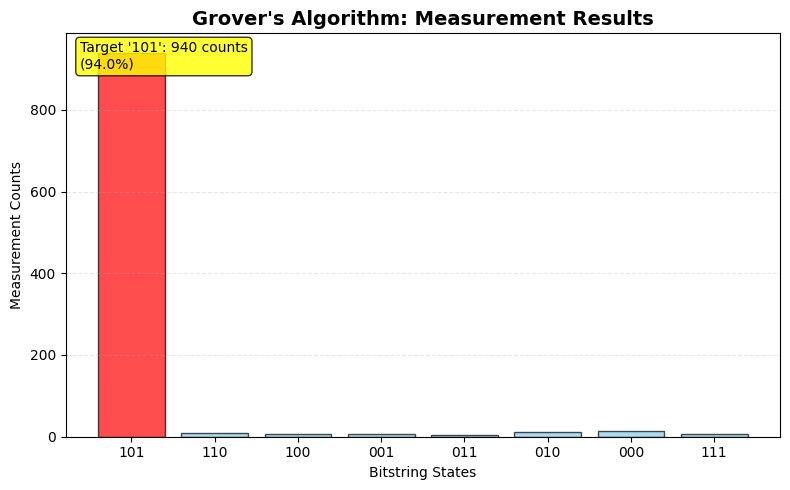

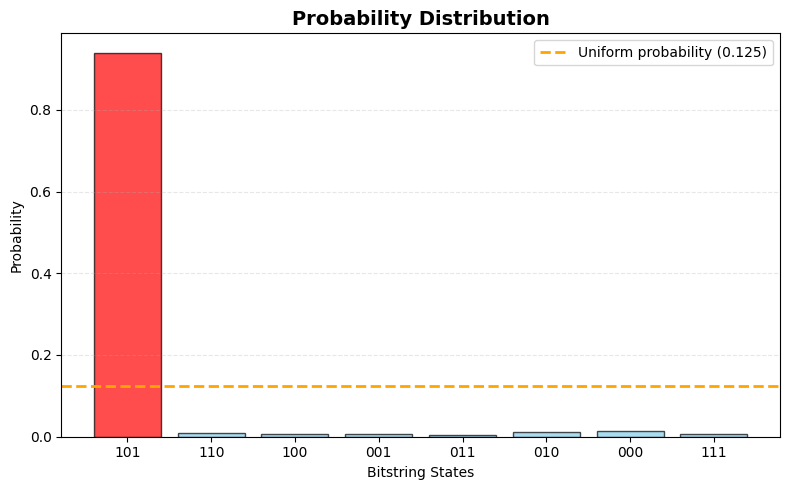

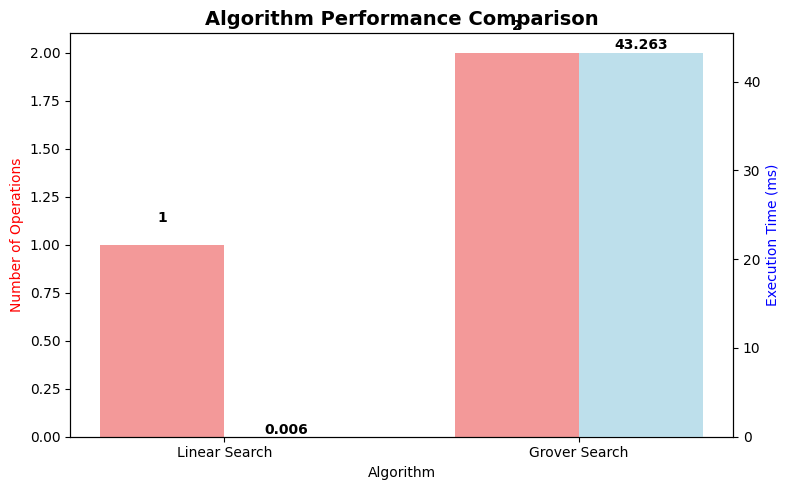

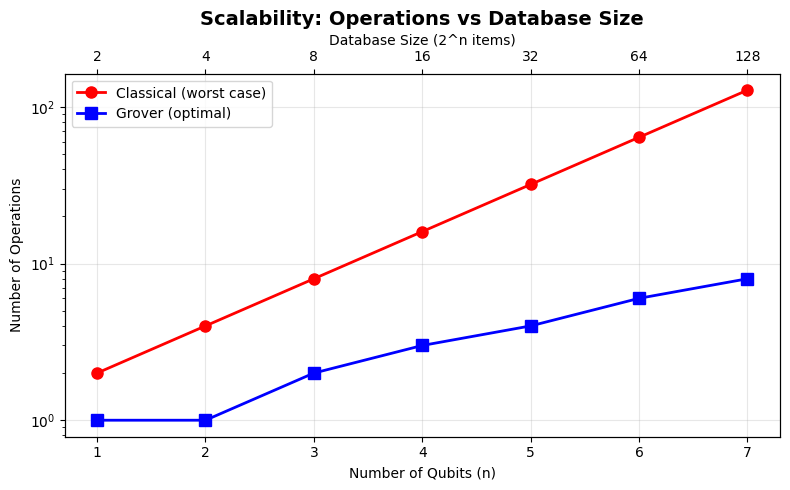


 DETAILED PERFORMANCE ANALYSIS

 Search Target: '101'
 Database Size: 8 items
 Theoretical Speedup: 4.00x
 Grover Success Rate: 94.0%

  Timing Comparison:
   Classical: 0.006 ms
   Quantum:   43.263 ms
   Ratio:     0.00x

 Operation Count:
   Classical: 1 comparisons
   Quantum:   2 iterations
   Reduction: -100.0%


In [ ]:
# def visualize_results(results):
#     #fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
#     fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 18))


#     counts = results['counts']
#     bitstrings = list(counts.keys())
#     frequencies = list(counts.values())
#     colors = ['red' if bs == results['target'] else 'skyblue' for bs in bitstrings]
#     bars1 = ax1.bar(bitstrings, frequencies, color=colors, edgecolor='black', alpha=0.7)
#     ax1.set_title("Grover's Algorithm: Measurement Results", fontsize=14, fontweight='bold')
#     ax1.set_xlabel('Bitstring States')
#     ax1.set_ylabel('Measurement Counts')
#     ax1.grid(axis='y', linestyle='--', alpha=0.3)
#     target_count = counts.get(results['target'], 0)
#     ax1.text(0.02, 0.98, f"Target '{results['target']}': {target_count} counts\n({target_count/sum(frequencies)*100:.1f}%)",
#              transform=ax1.transAxes, verticalalignment='top',
#              bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

#     total_shots = sum(frequencies)
#     probabilities = [f/total_shots for f in frequencies]
#     uniform_prob = 1/len(bitstrings)
#     bars2 = ax2.bar(bitstrings, probabilities, color=colors, edgecolor='black', alpha=0.7)
#     ax2.axhline(y=uniform_prob, color='orange', linestyle='--', linewidth=2,
#                 label=f'Uniform probability ({uniform_prob:.3f})')
#     ax2.set_title('Probability Distribution', fontsize=14, fontweight='bold')
#     ax2.set_xlabel('Bitstring States')
#     ax2.set_ylabel('Probability')
#     ax2.legend()
#     ax2.grid(axis='y', linestyle='--', alpha=0.3)

#     algorithms = ['Linear Search', 'Grover Search']
#     operations = [results['linear_comparisons'], results['grover_iterations']]
#     times = [results['linear_time']*1000, results['grover_time']*1000]  # ms
#     x = np.arange(len(algorithms))
#     width = 0.35
#     bars3a = ax3.bar(x - width/2, operations, width, label='Operations', color='lightcoral', alpha=0.8)
#     ax3_twin = ax3.twinx()
#     bars3b = ax3_twin.bar(x + width/2, times, width, label='Time (ms)', color='lightblue', alpha=0.8)
#     ax3.set_title('Algorithm Performance Comparison', fontsize=14, fontweight='bold')
#     ax3.set_xlabel('Algorithm')
#     ax3.set_ylabel('Number of Operations', color='red')
#     ax3_twin.set_ylabel('Execution Time (ms)', color='blue')
#     ax3.set_xticks(x)
#     ax3.set_xticklabels(algorithms)
#     for bar, val in zip(bars3a, operations):
#         ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
#                 str(val), ha='center', va='bottom', fontweight='bold')
#     for bar, val in zip(bars3b, times):
#         ax3_twin.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
#                      f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

#     n_qubits_range = range(1, 8)
#     db_sizes = [2**n for n in n_qubits_range]
#     classical_ops = db_sizes
#     quantum_ops = [calculate_optimal_iterations(n) for n in n_qubits_range]
#     ax4.plot(n_qubits_range, classical_ops, 'o-', label='Classical (worst case)',
#              color='red', linewidth=2, markersize=8)
#     ax4.plot(n_qubits_range, quantum_ops, 's-', label='Grover (optimal)',
#              color='blue', linewidth=2, markersize=8)
#     ax4.set_title('Scalability: Operations vs Database Size', fontsize=14, fontweight='bold')
#     ax4.set_xlabel('Number of Qubits (n)')
#     ax4.set_ylabel('Number of Operations')
#     ax4.set_yscale('log')
#     ax4.legend()
#     ax4.grid(True, alpha=0.3)
#     ax4_twin2 = ax4.twiny()
#     ax4_twin2.set_xlim(ax4.get_xlim())
#     ax4_twin2.set_xticks(list(n_qubits_range))
#     ax4_twin2.set_xticklabels([f'{2**n}' for n in n_qubits_range])
#     ax4_twin2.set_xlabel('Database Size (2^n items)')

#     plt.tight_layout()
#     plt.show()

#     print("\n" + "="*60)
#     print(" DETAILED PERFORMANCE ANALYSIS")
#     print("="*60)
#     print(f"\n Search Target: '{results['target']}'")
#     print(f" Database Size: {results['database_size']} items")
#     print(f" Theoretical Speedup: {results['theoretical_speedup']:.2f}x")
#     print(f" Grover Success Rate: {results['grover_success_rate']:.1f}%")
#     print(f"\n  Timing Comparison:")
#     print(f"   Classical: {results['linear_time']*1000:.3f} ms")
#     print(f"   Quantum:   {results['grover_time']*1000:.3f} ms")
#     print(f"   Ratio:     {results['linear_time']/results['grover_time']:.2f}x")
#     print(f"\n Operation Count:")
#     print(f"   Classical: {results['linear_comparisons']} comparisons")
#     print(f"   Quantum:   {results['grover_iterations']} iterations")
#     print(f"   Reduction: {(1 - results['grover_iterations']/results['linear_comparisons'])*100:.1f}%")


# visualize_results(results)

def visualize_results(results):
    counts = results['counts']
    bitstrings = list(counts.keys())
    frequencies = list(counts.values())
    colors = ['red' if bs == results['target'] else 'skyblue' for bs in bitstrings]

    fig1, ax1 = plt.subplots(figsize=(8, 5))
    bars1 = ax1.bar(bitstrings, frequencies, color=colors, edgecolor='black', alpha=0.7)
    ax1.set_title("Grover's Algorithm: Measurement Results", fontsize=14, fontweight='bold')
    ax1.set_xlabel('Bitstring States')
    ax1.set_ylabel('Measurement Counts')
    ax1.grid(axis='y', linestyle='--', alpha=0.3)
    target_count = counts.get(results['target'], 0)
    ax1.text(0.02, 0.98, f"Target '{results['target']}': {target_count} counts\n({target_count/sum(frequencies)*100:.1f}%)",
             transform=ax1.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))
    fig1.tight_layout()
    plt.show()
    plt.close(fig1)

    total_shots = sum(frequencies)
    probabilities = [f/total_shots for f in frequencies]
    uniform_prob = 1/len(bitstrings)
    fig2, ax2 = plt.subplots(figsize=(8, 5))
    bars2 = ax2.bar(bitstrings, probabilities, color=colors, edgecolor='black', alpha=0.7)
    ax2.axhline(y=uniform_prob, color='orange', linestyle='--', linewidth=2,
                label=f'Uniform probability ({uniform_prob:.3f})')
    ax2.set_title('Probability Distribution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Bitstring States')
    ax2.set_ylabel('Probability')
    ax2.legend()
    ax2.grid(axis='y', linestyle='--', alpha=0.3)
    fig2.tight_layout()
    plt.show()
    plt.close(fig2)

    algorithms = ['Linear Search', 'Grover Search']
    operations = [results['linear_comparisons'], results['grover_iterations']]
    times = [results['linear_time']*1000, results['grover_time']*1000]  # ms
    x = np.arange(len(algorithms))
    width = 0.35
    fig3, ax3 = plt.subplots(figsize=(8, 5))
    bars3a = ax3.bar(x - width/2, operations, width, label='Operations', color='lightcoral', alpha=0.8)
    ax3_twin = ax3.twinx()
    bars3b = ax3_twin.bar(x + width/2, times, width, label='Time (ms)', color='lightblue', alpha=0.8)
    ax3.set_title('Algorithm Performance Comparison', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Algorithm')
    ax3.set_ylabel('Number of Operations', color='red')
    ax3_twin.set_ylabel('Execution Time (ms)', color='blue')
    ax3.set_xticks(x)
    ax3.set_xticklabels(algorithms)
    for bar, val in zip(bars3a, operations):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                str(val), ha='center', va='bottom', fontweight='bold')
    for bar, val in zip(bars3b, times):
        ax3_twin.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f'{val:.3f}', ha='center', va='bottom', fontweight='bold')
    fig3.tight_layout()
    plt.show()
    plt.close(fig3)

    n_qubits_range = range(1, 8)
    db_sizes = [2**n for n in n_qubits_range]
    classical_ops = db_sizes
    quantum_ops = [calculate_optimal_iterations(n) for n in n_qubits_range]
    fig4, ax4 = plt.subplots(figsize=(8, 5))
    ax4.plot(n_qubits_range, classical_ops, 'o-', label='Classical (worst case)',
             color='red', linewidth=2, markersize=8)
    ax4.plot(n_qubits_range, quantum_ops, 's-', label='Grover (optimal)',
             color='blue', linewidth=2, markersize=8)
    ax4.set_title('Scalability: Operations vs Database Size', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Number of Qubits (n)')
    ax4.set_ylabel('Number of Operations')
    ax4.set_yscale('log')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4_twin2 = ax4.twiny()
    ax4_twin2.set_xlim(ax4.get_xlim())
    ax4_twin2.set_xticks(list(n_qubits_range))
    ax4_twin2.set_xticklabels([f'{2**n}' for n in n_qubits_range])
    ax4_twin2.set_xlabel('Database Size (2^n items)')
    fig4.tight_layout()
    plt.show()
    plt.close(fig4)

    print("\n" + "="*60)
    print(" DETAILED PERFORMANCE ANALYSIS")
    print("="*60)
    print(f"\n Search Target: '{results['target']}'")
    print(f" Database Size: {results['database_size']} items")
    print(f" Theoretical Speedup: {results['theoretical_speedup']:.2f}x")
    print(f" Grover Success Rate: {results['grover_success_rate']:.1f}%")
    print(f"\n  Timing Comparison:")
    print(f"   Classical: {results['linear_time']*1000:.3f} ms")
    print(f"   Quantum:   {results['grover_time']*1000:.3f} ms")
    print(f"   Ratio:     {results['linear_time']/results['grover_time']:.2f}x")
    print(f"\n Operation Count:")
    print(f"   Classical: {results['linear_comparisons']} comparisons")
    print(f"   Quantum:   {results['grover_iterations']} iterations")
    print(f"   Reduction: {(1 - results['grover_iterations']/results['linear_comparisons'])*100:.1f}%")


visualize_results(results)



### Try it yourself

#### What You Can Explore

#### Different Target Bitstrings

python

`custom_target = '1011'  # Try '00', '101', '1110', etc.`

**Experiments to try:**

- **2-bit targets:** `'00'`, `'01'`, `'10'`, `'11'`
    
- **3-bit targets:** `'000'`, `'111'`, `'101'`, etc.
    

**What to observe:** Does the target position in the database affect quantum performance? (Spoiler: No! Quantum search doesn't depend on position.)

#### Different Database Sizes

**Small databases (1-2 qubits):** Classical might be faster due to simplicity  
**Medium databases (3-4 qubits):** Quantum advantage becomes apparent  
**Large databases (5+ qubits):** Quantum advantage dominates (if hardware supports it)

#### Different Measurement Parameters

python

`custom_shots = 1000     # Try 100, 1000, 10000 custom_runs = 3         # Try 1, 5, 10`

**shots parameter:** More shots = better statistics but longer runtime  
**runs parameter:** More runs = more reliable timing measurements

#### Please Note :

**There are certain limitations:**

- **Binary only:** Quantum computers work with qubits (0 and 1 states)
    
- **Length limit:** Current implementation supports up to 3 qubits efficiently ( For demo ); larger requires advanced techniques

 Custom experiment: Searching for '11'
 Using 1000 shots and 3 timing runs
Benchmarking search for '11' in 4-item database
Database: ['01', '00', '11', '10']
CLASSICAL LINEAR SEARCH
Result: Found at index 2
Comparisons needed: 3/4
Average execution time: 0.000002 seconds
Success rate: 100%
QUANTUM GROVER SEARCH
Optimal iterations used: 1
Target measured: 1000/1000 times
Average execution time: 0.036356 seconds
Success rate: 100.0%
THEORETICAL ANALYSIS
Classical worst-case operations: 4
Quantum operations (iterations): 1
Theoretical speedup: 4.00x
Actual time ratio: 0.00x


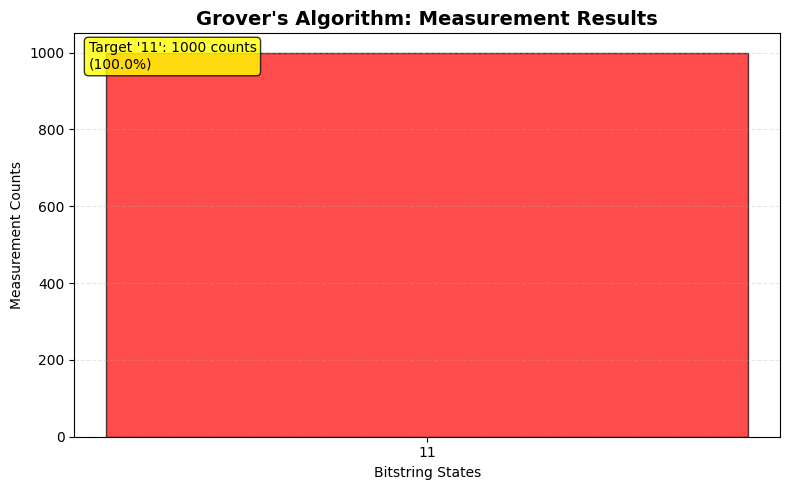

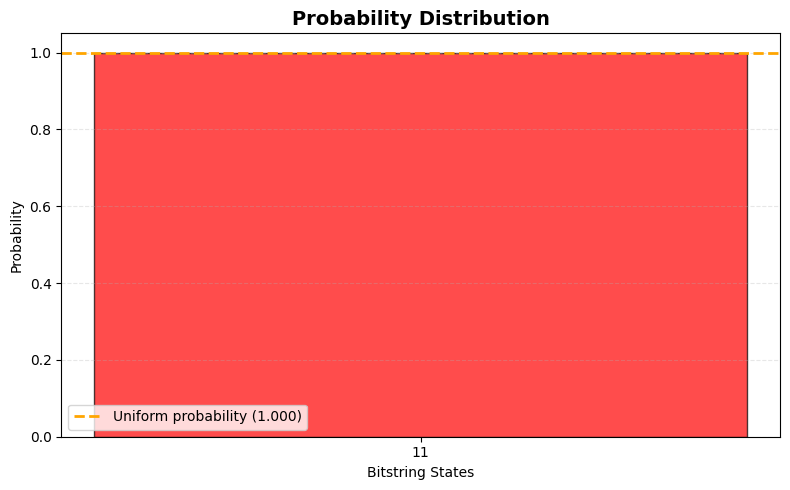

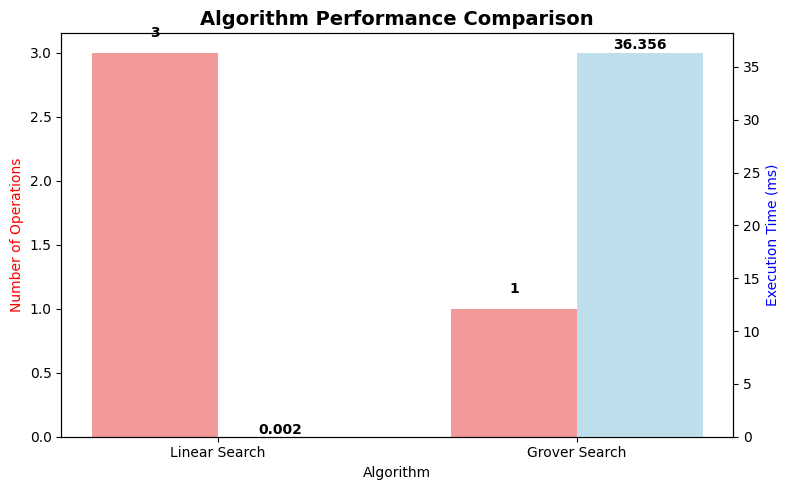

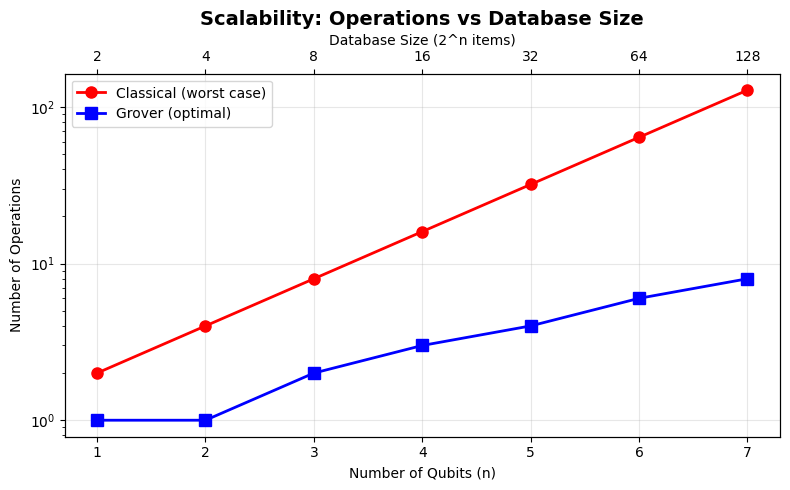


 DETAILED PERFORMANCE ANALYSIS

 Search Target: '11'
 Database Size: 4 items
 Theoretical Speedup: 4.00x
 Grover Success Rate: 100.0%

  Timing Comparison:
   Classical: 0.002 ms
   Quantum:   36.356 ms
   Ratio:     0.00x

 Operation Count:
   Classical: 3 comparisons
   Quantum:   1 iterations
   Reduction: 66.7%

 Custom experiment completed!
 Try changing the 'custom_target' variable above and re-run this cell.


In [ ]:
from braket.circuits.gate import *

#----Modify the code only HERE---------
custom_target = '11'  # Change this to any bitstring you want to search for
custom_shots = 1000     # Number of quantum measurements
custom_runs = 3         # Number of timing runs for averaging
#-------------------------------------


print(f" Custom experiment: Searching for '{custom_target}'")
print(f" Using {custom_shots} shots and {custom_runs} timing runs")

if not all(bit in '01' for bit in custom_target):
    print(" Error: Target must be a binary string (only 0s and 1s)")
elif len(custom_target) > 6:
    print(" Error: Target too long (max 6 bits for this demo)")
else:
    custom_results = benchmark_algorithms(
        custom_target,
        len(custom_target),
        shots=custom_shots,
        runs=custom_runs
    )
    visualize_results(custom_results)
    print("\n Custom experiment completed!")
    print(" Try changing the 'custom_target' variable above and re-run this cell.")


## For Further Research Questions to Explore

1. **Does target pattern matter?** Compare `'000'` vs `'111'` vs `'101'`
    
2. **How does success rate change with iterations?** Modify the iteration count
    
3. **What happens with more shots?** Does higher shot count improve reliability?
    
4. **Where's the classical/quantum crossover?** At what database size does quantum win?
    
